In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
import os
from beamline34IDC.simulation.facade import Implementors
from beamline34IDC.simulation.facade.focusing_optics_factory import focusing_optics_factory_method
from beamline34IDC.simulation.facade.focusing_optics_interface import Movement

from beamline34IDC.util.shadow.common import \
    plot_shadow_beam_spatial_distribution, get_shadow_beam_spatial_distribution,\
    load_shadow_beam, PreProcessorFiles, EmptyBeamException
import beamline34IDC.optimization.common as opt_common
#import beamline34IDC.optimization.movers as movers
from beamline34IDC.util import clean_up
import matplotlib.pyplot as plt
import numpy as np
import scipy
from tqdm import tqdm
#from beamline34IDC.util.redirect_shadow_output import redirected_output

In [2]:
%matplotlib inline

In [3]:
DEFAULT_RANDOM_SEED = 111

In [4]:
work_dir = '/Users/saugat/code/oasys/ML_Control_System/work_directory'
os.chdir(work_dir)
input_beam_path = "primary_optics_system_beam.dat"
#input_beam = load_shadow_beam()

In [5]:
fig_save_path = 'figures/other_tests/'

In [6]:
if not os.path.isdir(fig_save_path):
    print("Fig save directory does not exist. Trying to create.")
    os.mkdir(fig_save_path)

In [16]:
def reinitialize(input_beam_path):
    clean_up()

    input_beam = load_shadow_beam(input_beam_path)
    focusing_system = focusing_optics_factory_method(implementor=Implementors.SHADOW)

    focusing_system.initialize(input_photon_beam=input_beam,
                               rewrite_preprocessor_files=PreProcessorFiles.NO,
                               rewrite_height_error_profile_files=False)
    return focusing_system

In [7]:
clean_up()

In [18]:
# Focusing Optics System -------------------------
#with redirected_output():
focusing_system = reinitialize(input_beam_path=input_beam_path)

/Applications/Oasys1.2.app/Contents/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  del sys.path[0]


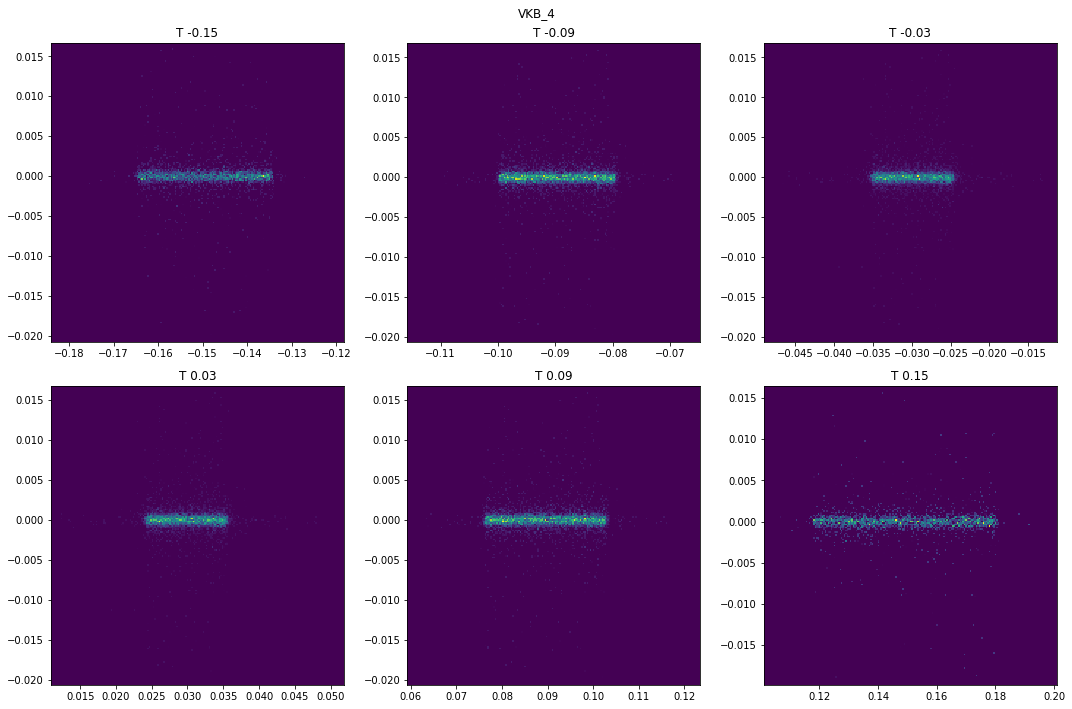

In [19]:
# Motor vkb 4
translations = np.linspace(-0.15, 0.15, 6)
initial_value = focusing_system.get_vkb_motor_4_translation()

fig, axes = plt.subplots(2, 3, figsize=[15, 10])

for ix, trans in enumerate(translations):
    # Moving to a new value
    focusing_system.move_vkb_motor_4_translation(trans, movement=Movement.RELATIVE)
    trans_beam = focusing_system.get_photon_beam(random_seed=DEFAULT_RANDOM_SEED)
    
    hist, dw = get_shadow_beam_spatial_distribution(trans_beam)
    axes.flat[ix].pcolormesh(hist.vv, hist.hh, hist.data_2D)
    axes.flat[ix].set_title(f'T {trans:3.2f}')
    
    # Resetting to initial value
    focusing_system.move_vkb_motor_4_translation(initial_value, movement=Movement.ABSOLUTE)
plt.suptitle('VKB_4')
plt.tight_layout()
plt.show()


/Applications/Oasys1.2.app/Contents/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  app.launch_new_instance()


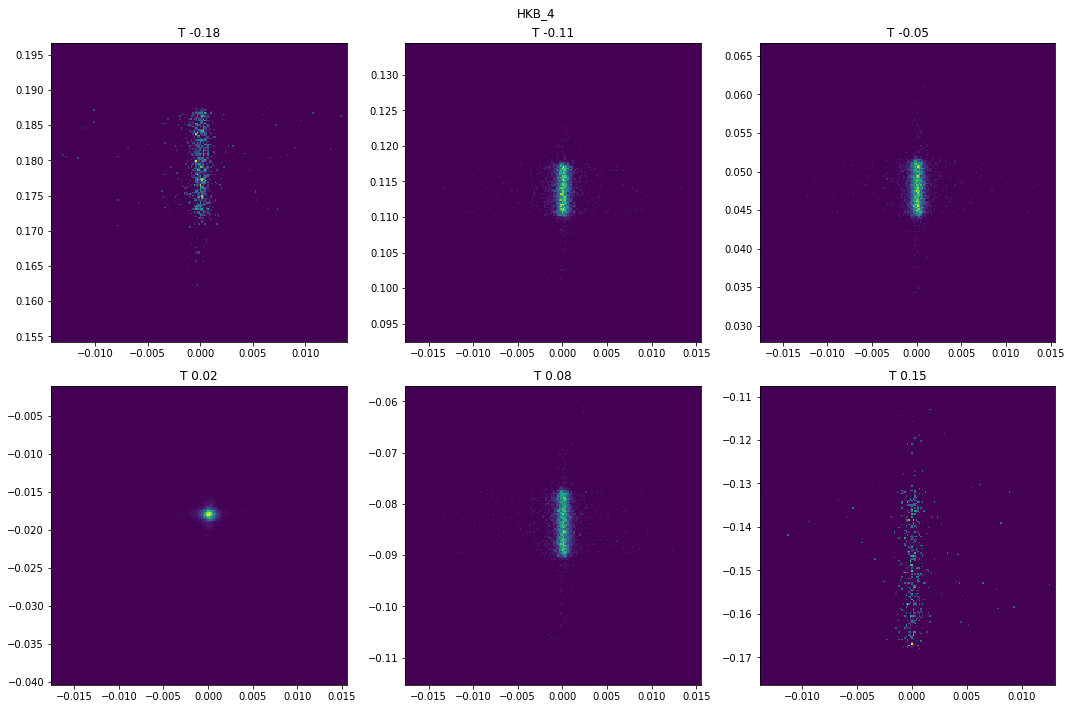

In [21]:
# Motor hkb 4

focusing_system = reinitialize(input_beam_path=input_beam_path)

translations = np.linspace(-0.18, 0.15, 6)
initial_value = focusing_system.get_hkb_motor_4_translation()

fig, axes = plt.subplots(2, 3, figsize=[15, 10])

for ix, trans in enumerate(translations):
    # Moving to a new value
    focusing_system.move_hkb_motor_4_translation(trans, movement=Movement.RELATIVE)
    trans_beam = focusing_system.get_photon_beam(random_seed=DEFAULT_RANDOM_SEED)
    
    hist, dw = get_shadow_beam_spatial_distribution(trans_beam)
    axes.flat[ix].pcolormesh(hist.vv, hist.hh, hist.data_2D)
    axes.flat[ix].set_title(f'T {trans:3.2f}')
    
    # Resetting to initial value
    focusing_system.move_hkb_motor_4_translation(initial_value, movement=Movement.ABSOLUTE)
plt.suptitle('HKB_4')
plt.tight_layout()
plt.show()


/Applications/Oasys1.2.app/Contents/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  app.launch_new_instance()


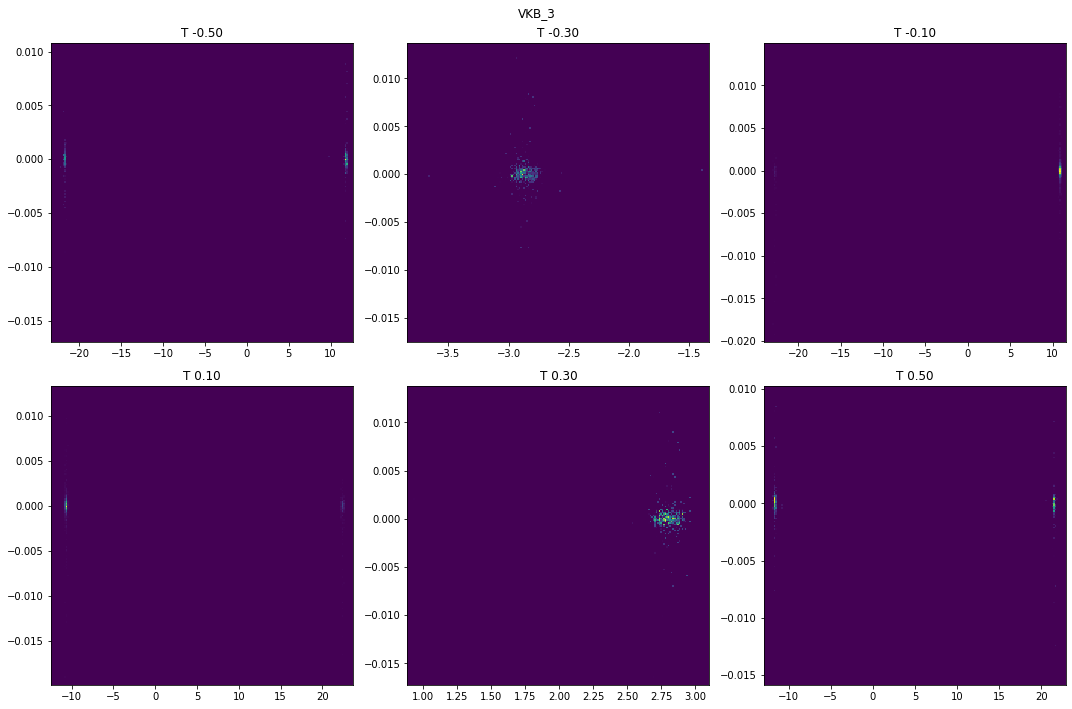

In [22]:
# Motor vkb 3

focusing_system = reinitialize(input_beam_path=input_beam_path)
initial_value = focusing_system.get_vkb_motor_3_pitch()[0]

translations = np.linspace(-0.5, 0.5, 6)

fig, axes = plt.subplots(2, 3, figsize=[15, 10])

for ix, trans in enumerate(translations):
    # Moving to a new value
    focusing_system.move_vkb_motor_3_pitch(trans, movement=Movement.RELATIVE)
    trans_beam = focusing_system.get_photon_beam(random_seed=DEFAULT_RANDOM_SEED)
    
    hist, dw = get_shadow_beam_spatial_distribution(trans_beam)
    axes.flat[ix].pcolormesh(hist.vv, hist.hh, hist.data_2D)
    axes.flat[ix].set_title(f'T {trans:3.2f}')
    
    # Resetting to initial value
    focusing_system.move_vkb_motor_3_pitch(initial_value, movement=Movement.ABSOLUTE)
plt.suptitle('VKB_3')
plt.tight_layout()
plt.show()


/Applications/Oasys1.2.app/Contents/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  app.launch_new_instance()


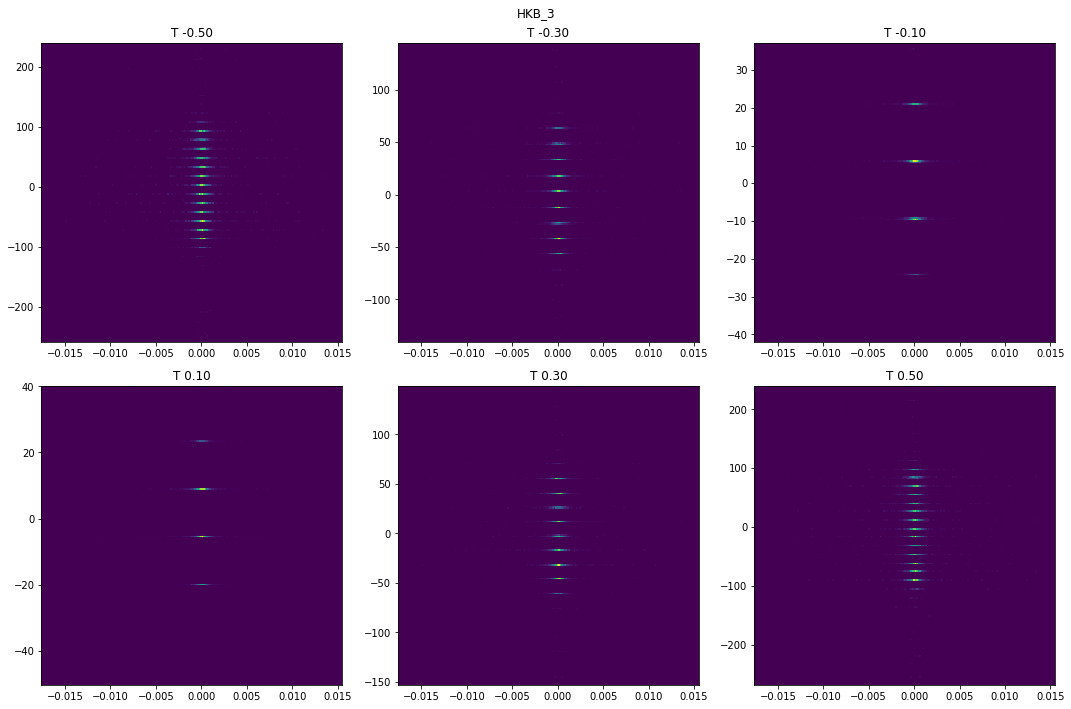

In [23]:
# Motor hkb 3

focusing_system = reinitialize(input_beam_path=input_beam_path)
initial_value = focusing_system.get_hkb_motor_3_pitch()[0]

translations = np.linspace(-0.5, 0.5, 6)

fig, axes = plt.subplots(2, 3, figsize=[15, 10])

for ix, trans in enumerate(translations):
    # Moving to a new value
    focusing_system.move_hkb_motor_3_pitch(trans, movement=Movement.RELATIVE)
    trans_beam = focusing_system.get_photon_beam(random_seed=DEFAULT_RANDOM_SEED)
    
    hist, dw = get_shadow_beam_spatial_distribution(trans_beam)
    axes.flat[ix].pcolormesh(hist.vv, hist.hh, hist.data_2D)
    axes.flat[ix].set_title(f'T {trans:3.2f}')
    
    # Resetting to initial value
    focusing_system.move_hkb_motor_3_pitch(initial_value, movement=Movement.ABSOLUTE)
plt.suptitle('HKB_3')
plt.tight_layout()
plt.show()


/Applications/Oasys1.2.app/Contents/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


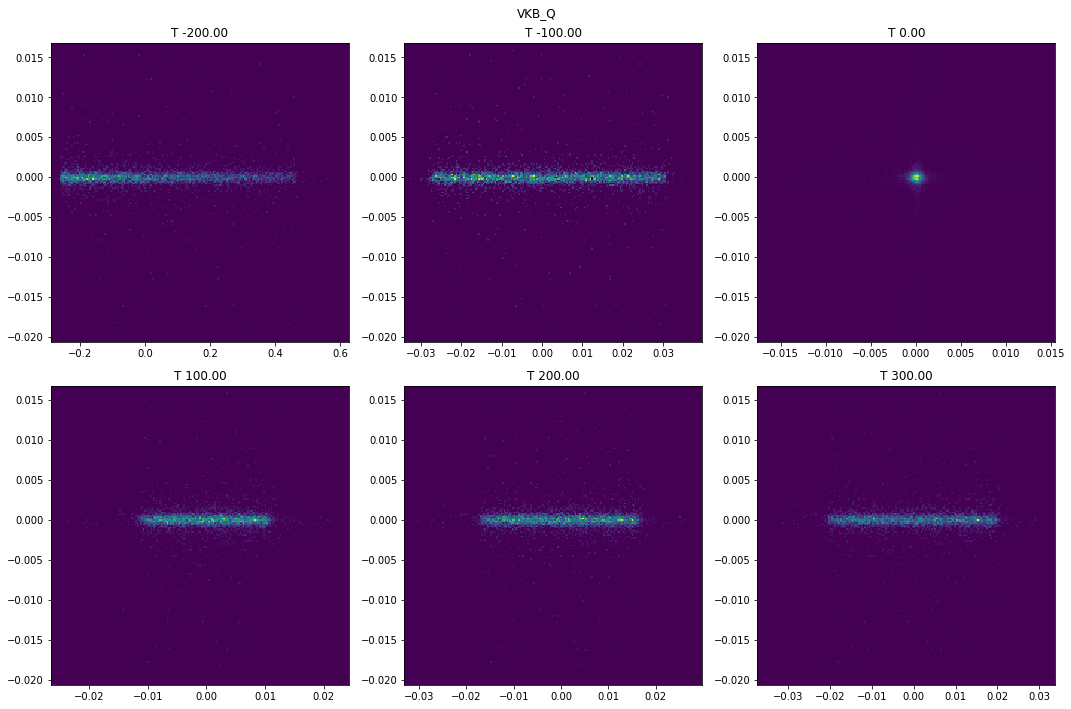

In [24]:
# Motor vkb q
# The strange thing about vkb and hkb q distances is that they have minimum values, but not maximum values.
# For vkb
# Minimum: 
#     A relative motion of < -200 from the starting position gives an EmptyBeamException.
# Maximum: 
#     After a certain point (I am not sure exactly when), no matter what "maximum" value I set, 
#     I get the same beam output anyway.

focusing_system = reinitialize(input_beam_path=input_beam_path)
initial_value = focusing_system.get_vkb_q_distance()

translations = np.linspace(-200, 300, 6)

fig, axes = plt.subplots(2, 3, figsize=[15, 10])

for ix, trans in enumerate(translations):
    # Moving to a new value
    focusing_system.change_vkb_shape(trans, movement=Movement.RELATIVE)
    trans_beam = focusing_system.get_photon_beam(random_seed=DEFAULT_RANDOM_SEED)
    
    hist, dw = get_shadow_beam_spatial_distribution(trans_beam)
    axes.flat[ix].pcolormesh(hist.vv, hist.hh, hist.data_2D)
    axes.flat[ix].set_title(f'T {trans:3.2f}')
    
    # Resetting to initial value
    focusing_system.change_vkb_shape(initial_value, movement=Movement.ABSOLUTE)
plt.suptitle('VKB_Q')
plt.tight_layout()
plt.show()


/Applications/Oasys1.2.app/Contents/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  from ipykernel import kernelapp as app


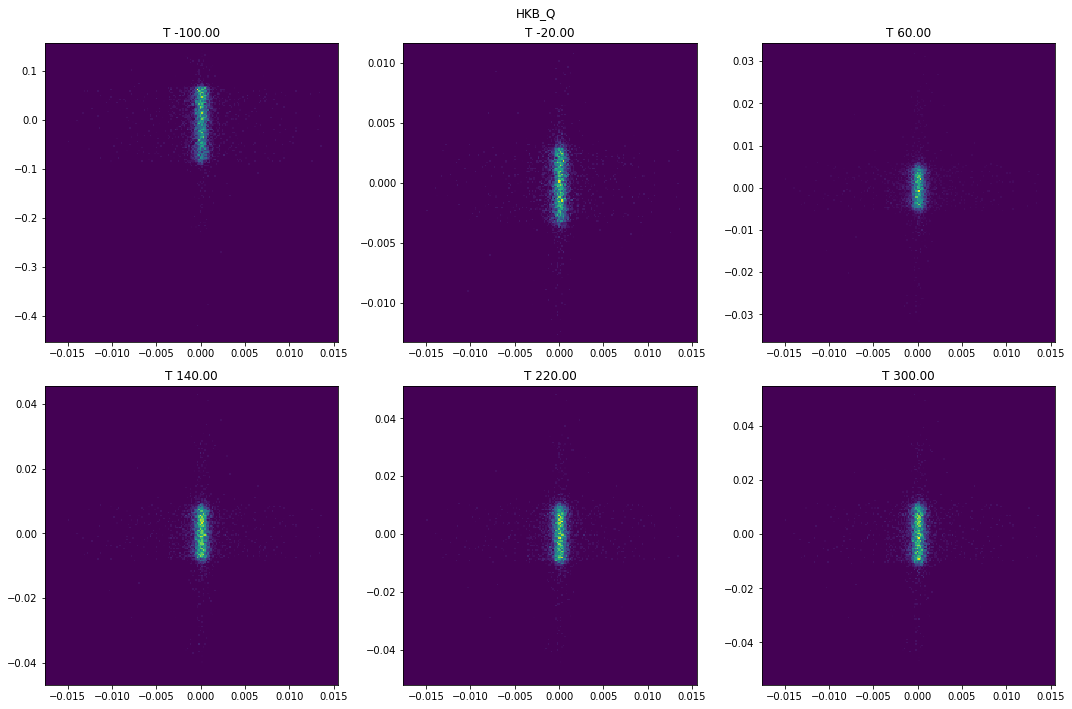

In [27]:
# Motor hkb q
# The minimum seems to be around -100.

focusing_system = reinitialize(input_beam_path=input_beam_path)
initial_value = focusing_system.get_hkb_q_distance()

translations = np.linspace(-100, 300, 6)

fig, axes = plt.subplots(2, 3, figsize=[15, 10])

for ix, trans in enumerate(translations):
    # Moving to a new value
    focusing_system.change_hkb_shape(trans, movement=Movement.RELATIVE)
    trans_beam = focusing_system.get_photon_beam(random_seed=DEFAULT_RANDOM_SEED)
    
    hist, dw = get_shadow_beam_spatial_distribution(trans_beam)
    axes.flat[ix].pcolormesh(hist.vv, hist.hh, hist.data_2D)
    axes.flat[ix].set_title(f'T {trans:3.2f}')
    
    # Resetting to initial value
    focusing_system.change_hkb_shape(initial_value, movement=Movement.ABSOLUTE)
plt.suptitle('HKB_Q')
plt.tight_layout()
plt.show()

In [21]:
clean_up()